![title](https://image.ibb.co/erDntK/logo2018.png)

---




# Task 12 part 1/3 - Train CIFAR10 using CPU

In this first part of assignment you will try to train a five layer CNN on CIFAR-10 dataset using CPU just to feel the comparison on using CPU, GPU, and later TPU


The goals of this assignment are as follows:

<pre> * train a five layer CNN using CPU


---
---
#[Part 0] Import Libraries and Load Data

---
## 0 - Acceleration Setting

This time we will check the ability of TensorFlow if it is run with CPU acceleration.

For that, make sure that this Google Colab **does not** use Runtime acceleration.
* Select the Runtime menu
* Change Runtime Type
* Choose **None**

<img src = "https://i.ibb.co/qnLhwLQ/none.png" align = "center">


---
## 1 - Install TensorFlow 2

If Tensorflow 2 is not already installed, install it first

In [1]:
!pip install tensorflow-gpu -q

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 450kB 50.3MB/s 
     |████████████████████████████████| 3.8MB 63.4MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.


In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

**EXPECTED OUTPUT**:
<pre>
 '2.0.0'

In [3]:
import torch
torch.__version__

'1.3.0+cu100'

**EXPECTED OUTPUT**:
<pre>
 '1.3.0'

---
## 2 - Import Libraries
Import required libraries

In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import pprint

from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

%matplotlib inline
np.set_printoptions(precision=7)
%load_ext autoreload
%autoreload 2

Write down your Name and Student ID

In [0]:
## --- start your code here ----

NIM = 1301160098
Nama = "Panji Bagaskara"

## --- end your code here ----

---
## 3 - Load CIFAR-10

In [6]:
(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170500096/170498071 [==============================] - 6s 0us/step


---
## 4 - Split Validation Data

In [0]:
X_val_ori = X_train_ori[-10000:,:]
y_val     = y_train[-10000:]

X_train_ori = X_train_ori[:-10000, :]
y_train     = y_train[:-10000]

---
## 5 - Normalize and Reshape Data

In [8]:
X_train = X_train_ori.astype('float32')
X_val   = X_val_ori.astype('float32')
X_test  = X_test_ori.astype('float32')

mean_image = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_image = X_train.std(axis=(0, 1, 2), keepdims=True)

X_train = (X_train - mean_image) /std_image
X_val = (X_val - mean_image) /std_image
X_test = (X_test - mean_image) /std_image

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

y_train = y_train.ravel()
y_val   = y_val.ravel()
y_test  = y_test.ravel()

print('\ny_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (40000, 32, 32, 3)
X_val.shape   = (10000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)

y_train.shape = (40000,)
y_val.shape   = (10000,)
y_test.shape  = (10000,)


one hot the label

In [9]:
y_train_hot = to_categorical(y_train, 10)
y_val_hot   = to_categorical(y_val, 10)
y_test_hot  = to_categorical(y_test, 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (40000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


---
## 6 - Helper Function

In [0]:
def plot_history(history):
  plt.rcParams['figure.figsize'] = [12, 4]
  plt.subplots_adjust(wspace=0.2)

  plt.subplot(121)
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'])

  plt.subplot(122)
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'])
  plt.show()

---
---
# [Part 1] Device Acceleration Checking

## 1 - GPU Availability Check

Next, let's check TensorFlow and PyTorch's ability to utilize GPU capabilities

**Because we set this Google Colab to run without acceleration, there will be no GPU name displayed**

In [11]:
print('Using GPU:', tf.test.is_gpu_available())

if tf.test.is_gpu_available():
  print('GPU name :', tf.test.gpu_device_name())


Using GPU: False


**EXPECTED OUTPUT**:
<pre>
 Using GPU: False

In [12]:
print('Using GPU:',torch.cuda.is_available())

if torch.cuda.is_available():
  print('GPU name :',torch.cuda.get_device_name(0))


Using GPU: False


**EXPECTED OUTPUT**:
<pre>
 Using GPU: False

## 2 - TPU Availability Check

Then, let's check TensorFlow's ability to utilize TPU capabilities 

**Because we set this Google Colab to run without acceleration, there will be no TPU acceleration that can be used**

In [13]:
if 'COLAB_TPU_ADDR' not in os.environ:
  print('Not connected to a TPU runtime')
  
else:
  
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  # for tf 2.x
  # tf.config.experimental_connect_to_host(tpu_address)
  # devices=tf.config.experimental_list_devices()
  
  # for tf 1.x  
  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:') 
  print(*devices, sep="\n")

Not connected to a TPU runtime


**EXPECTED OUTPUT**:
<pre>
Not connected to a TPU runtime

---
---
# [Part 2] Train 5-layer ConvNet

Now let's build and train our model



In [0]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


---
## 1 - Model Builder

#### <font color='red'>**EXERCISE**: </font>
**Define a ConvNet Model as follow**

    * 32 @ Conv 3x3 using relu and padding same
    * 32 @ Conv 3x3 using relu and padding same
    * Max Pool
    * 64 @ Conv 3x3 using relu and padding same    
    * Max Pool
    * Flatten
    * Dense 200 using relu
    * Dense 10 using softmax
    
    then compile using categorical crossentropy and optimizer adam


In [0]:
def FiveConvNet(name):
  
  model = Sequential([

      Conv2D(32, (3,3), padding='SAME', activation='relu', input_shape=(32,32,3)), # conv
      Conv2D(32, (3,3), padding='SAME', activation='relu'), # conv
      MaxPool2D(), # pool
      Conv2D(64, (3,3), padding='SAME', activation='relu'), # conv
      MaxPool2D(), # pool
      Flatten(), # flatten
      Dense(200, activation='relu'), # dense
      Dense(10, activation='softmax')  # dense
      
  ], name = name) 
  
  model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
  
  return model

---
## 2 - Define Model

In [20]:
model = FiveConvNet('using_CPU')

model.summary()

Model: "using_CPU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               81

**EXPECTED OUTPUT**:
<pre>
Model: "using_CPU"
conv2d (Conv2D)              (None, 32, 32, 32)        896       
...
dense_? (Dense)              (None, 10)                2010        

Total params: 850,050
Trainable params: 850,050
Non-trainable params: 0
_________________________________________________________________

---
## 3 - Train Model


#### <font color='red'>**EXERCISE**: </font>
**Train the model for 8 epochs using batch size 200**

**Don't forget to feed the validation data**


    

In [21]:
import time

num_epochs = 8
batch_size = 200

tic = time.time()

history = model.fit(X_train, y_train_hot, 
                    validation_data=(X_val, y_val_hot),
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    verbose=2)

toc = time.time()

print('\n\ntraining speed = %.2f seconds' % (toc-tic))
print('training speed = %.2f minutes' % ((toc-tic)/60))

Train on 40000 samples, validate on 10000 samples
Epoch 1/8
40000/40000 - 161s - loss: 1.4240 - accuracy: 0.4918 - val_loss: 1.1512 - val_accuracy: 0.5980
Epoch 2/8
40000/40000 - 159s - loss: 1.0043 - accuracy: 0.6465 - val_loss: 0.9942 - val_accuracy: 0.6525
Epoch 3/8
40000/40000 - 160s - loss: 0.8347 - accuracy: 0.7089 - val_loss: 0.8747 - val_accuracy: 0.6967
Epoch 4/8
40000/40000 - 161s - loss: 0.7045 - accuracy: 0.7554 - val_loss: 0.8692 - val_accuracy: 0.7007
Epoch 5/8
40000/40000 - 160s - loss: 0.5980 - accuracy: 0.7904 - val_loss: 0.8596 - val_accuracy: 0.7142
Epoch 6/8
40000/40000 - 161s - loss: 0.4904 - accuracy: 0.8289 - val_loss: 0.8143 - val_accuracy: 0.7297
Epoch 7/8
40000/40000 - 161s - loss: 0.3979 - accuracy: 0.8630 - val_loss: 0.8676 - val_accuracy: 0.7265
Epoch 8/8
40000/40000 - 160s - loss: 0.3095 - accuracy: 0.8929 - val_loss: 0.9129 - val_accuracy: 0.7307


training speed = 1283.39 seconds
training speed = 21.39 minutes


**EXPECTED OUTPUT**:
<pre>
Your model should run in about 2.5 minutes per epoch

---
## 4 - Visualize Training

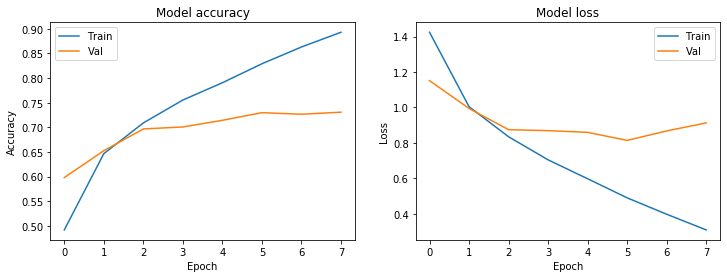

In [22]:
plot_history(history)

---
## 5 - Evaluate Model

In [23]:
val_scores   = model.evaluate(X_val, y_val_hot, verbose=2)
test_scores  = model.evaluate(X_test, y_test_hot, verbose=2)

10000/1 - 12s - loss: 1.0669 - accuracy: 0.7307
10000/1 - 12s - loss: 1.1188 - accuracy: 0.7224


**EXPECTED OUTPUT**:
<pre>
You should get around 72% accuracy on data test
tough the model is overfit


---

# Congratulation, You've Completed Exercise 12 part 1/3

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2019 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)